## DBSCAN Implementation From Scratch

In this netbook, we will implement the DBSCAN clustering method from scratch using `numpy`. We will then test it on this [dataset](https://www.kaggle.com/datasets/ankit8467/dataset-for-dbscan/code). We will use `matplotlib` and `seaborn` to visualize the data.

### Installation & Setup

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [9]:
import os
import pickle

X = pickle.load(open(os.path.join('data', 'dbscan2000.pkl'), 'rb'))

### EDA & Data Visualization

In [10]:
X

array([[-2.73226642,  0.11453887],
       [-0.22062047,  0.99308232],
       [ 3.3841416 , -0.95665906],
       ...,
       [ 3.56339167,  0.43936267],
       [-3.59822956,  0.1965186 ],
       [ 4.02733159, -0.19364141]])

In [11]:
len(X)

2000

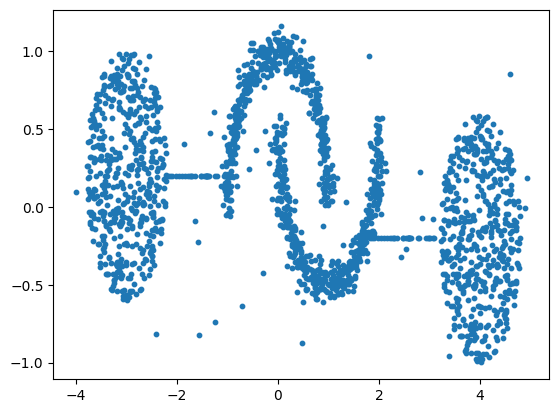

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0] , X[:,1], s=10)

`calculate_neighbors`: Computes the neighbors of each point and returns a dictionary containing the neighbors for each point.

In [25]:
import math
import numpy as np

def calculate_neighbors(X, eps):
    dict_neb = {}
    for i in range(len(X)):
        neb = [j for j in range(len(X)) if math.dist(X[i], X[j]) <= eps]
        dict_neb[i] = list(set(neb) - {i})
    return dict_neb

`identify_core_points`: Identifies core points based on the minimum number of neighbors (minpt).

In [26]:
def identify_core_points(dict_neb, minpt):
    core = [i for i, neighbors in dict_neb.items() if len(neighbors) >= minpt]
    return core

`classify_points`: Classifies points into boundary points, boundary outliers, and noise points based on their relationship with core points and their neighbors.

In [16]:
def classify_points(core, dict_neb, X):
    bound = []
    bound_outlr = []
    for k in range(len(X)):
        if k not in core:
            if any(j in core for j in dict_neb[k]):
                bound.append(k)
            else:
                bound_outlr.append(k)
    outlr = list(set(range(len(X))) - set(core) - set(bound) - set(bound_outlr))
    return bound, bound_outlr, outlr

In [17]:
def core_bound_outlr(eps, minpt, X):
    dict_neb = calculate_neighbors(X, eps)
    core = identify_core_points(dict_neb, minpt)
    bound, bound_outlr, outlr = classify_points(core, dict_neb, X)
    return core, bound, bound_outlr, outlr

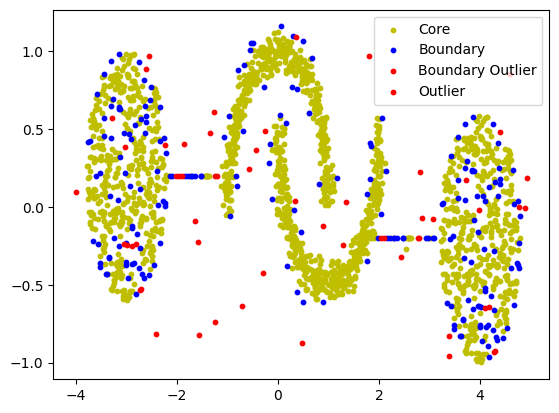

In [27]:
eps = 0.1
minpt = 5
core, bound, bound_outlr, outlr = core_bound_outlr(eps , minpt , X)
plt.scatter(X[core][:,0], X[core][:,1], c='g', s=10)
plt.scatter(X[bound][:,0], X[bound][:,1], c='y', s=10)
plt.scatter(X[bound_outlr][:,0], X[bound_outlr][:,1], c='b', s=10)
plt.scatter(X[outlr][:,0], X[outlr][:,1], c='r', s=10)
plt.legend(['Core', 'Boundary', 'Boundary Outlier', 'Outlier'])